<a href="https://colab.research.google.com/github/sharansarthak/VTH-Hacks/blob/main/VITHacks9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install google_play_scraper
!pip install sklearn
!pip install transformers requests beautifulsoup4 pandas numpy
!pip install torch
!pip install neattext

In [2]:
import transformers
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import requests
from bs4 import BeautifulSoup
import re
import seaborn as sns
import neattext.functions as nfx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
pd.set_option('display.max_colwidth', 1000) 
import nltk
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('punkt')
nltk.download('stopwords')

from google_play_scraper.features.reviews import Sort, reviews_all, reviews  
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [75]:
result,continuation_token= reviews('org.mozilla.firefox',lang='en',country='us',sort=Sort.MOST_RELEVANT, count=1000)

# Takes the reviews from google 


In [76]:
result[0]['content']

"More stable than in the past but more frustrating to use. My Firefox is stuck in a full-screen activity and I can't find how to turn it off. The UI and user options are completely trash and even less intuitive to navigate than the desktop Firefox. Mozilla seems to have become a feckless organization and I will no longer be donating. What an absolute joke. I hope you replace the person Making such outdated and horrible decisions."

In [77]:
df = pd.DataFrame(result)
df_app=pd.DataFrame(np.array(df['content']),columns=['review'])

# convert result to a dataframe and take the content from the result to another dataframe.

In [78]:
df_app['review']=df_app['review'].apply(nfx.remove_hashtags).apply(nfx.remove_emojis).apply(nfx.remove_urls).apply(nfx.remove_userhandles).apply(nfx.remove_multiple_spaces).apply(nfx.remove_punctuations)

In [ ]:
df_app

In [15]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

Downloading:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/953 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/851k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/638M [00:00<?, ?B/s]

In [80]:
def get_sentiment_score(text):
  tokens = tokenizer.encode(text, return_tensors='pt')
  result= model(tokens)
#   print(int(torch.argmax(result.logits))+1)
  return int(torch.argmax(result.logits))+1


In [81]:
df_app['sentiment']=df_app['review'].apply(lambda x: get_sentiment_score(x[:512]))


In [ ]:
df_app

In [82]:
from google.colab import files

df_app.to_csv('sentiment_fireFox.csv', encoding = 'utf-8-sig') 
files.download('sentiment_fireFox.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [83]:
negative_reviews = df_app[df_app['sentiment']<=3]['review']
df_app=df_app.drop_duplicates()
df_negative=pd.DataFrame(np.array(negative_reviews),columns=['processed_review'])

In [84]:
df_negative

,processed_review
0,More stable than in the past but more frustrating to use My Firefox is stuck in a fullscreen activity and I cant find how to turn it off The UI and user options are completely trash and even less intuitive to navigate than the desktop Firefox Mozilla seems to have become a feckless organization and I will no longer be donating What an absolute joke I hope you replace the person Making such outdated and horrible decisions
1,Its getting better but after the most recent updates the search engines wont hold their settings I dont seem to have the same problem in chrome or other browsers Ive tried It only seems to be firefox that has this problem I can open the settings page in any of the searches: google bing duck duck go and turn safe search on off or strict when I hit save it all goes back to default and wont save settings I hope you can address this issue in an update
2,This app used to be great but not anymore Just another example of software engineers constantly changing things to justify their jobs They have moved the back forward and refresh buttons into the three dots menu making it a pain to use these basic functions Overall the app has become the opposite of why I liked it in the first place Uninstalling it for now Ill try back again in a year maybe
3,I used to love the app until the last update The browser hides the android buttons for back and home along the bottom of my screen and the time signal and battery icons along the top screen Change it so you have the option of setting your custom settings to not having to swipe down to back up I dont need another quarter inch of screen space I would much rather be able to back up or go to menu in a single motion or I dont know be able to see if I am still connected to the internet
4,The UI is miserable its so taxing to navigate anywhere within the settings Options like Print page and Search through Bookmarks are gone The Bookmark manu looks awful and handles like its from the 90s Cant figure out how to pull up desktop tabs now Theres great lack of addons now Data collection is on by default No data saving web compression feature like Chrome History has no sorting or search feature
...,...
652,When am opening the app sometimes the screen is blank and no link works
653,Started to crash repeatedly over the last few days on my huawei phone
654,No always on Desktop mode and no automatic text reflow on zoom
655,New update or something the app always gets stuck in full screen mode


In [85]:
cv = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
vectorizer = cv.fit_transform(df_negative['processed_review'])

In [86]:
LDA = LatentDirichletAllocation(n_components=3,random_state=1)
LDA.fit(vectorizer)

LatentDirichletAllocation(n_components=3, random_state=1)

In [87]:
for index,topic in enumerate(LDA.components_):
    print(f'topic #{index} : ')
    print([cv.get_feature_names()[i] for i in topic.argsort()[-20:]])

topic #0 : 
['buttons', 'want', 'desktop', 'time', 'android', 'google', 'new', 'dont', 'home', 'like', 'use', 'page', 'video', 'option', 'mode', 'app', 'bar', 'update', 'firefox', 'screen']
topic #1 : 
['data', 'page', 'user', 'pages', 'version', 'doesnt', 'want', 'just', 'history', 'chrome', 'tab', 'download', 'update', 'search', 'google', 'dont', 'firefox', 'like', 'new', 'browser']
topic #2 : 
['desktop', 'mobile', 'good', 'version', 'used', 'bookmarks', 'using', 'android', 'update', 'new', 'time', 'use', 'chrome', 'open', 'just', 'tab', 'app', 'tabs', 'browser', 'firefox']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [88]:
[cv.get_feature_names()[i] for i in topic.argsort()[-20:]]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['desktop',
 'mobile',
 'good',
 'version',
 'used',
 'bookmarks',
 'using',
 'android',
 'update',
 'new',
 'time',
 'use',
 'chrome',
 'open',
 'just',
 'tab',
 'app',
 'tabs',
 'browser',
 'firefox']

In [89]:
from gensim.parsing.preprocessing import remove_stopwords

Clusters = [cv.get_feature_names()[i] for i in topic.argsort()[-20:]]

len(Clusters)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


20

In [90]:
topic_results = LDA.transform(vectorizer)
df_topic_results = pd.DataFrame(topic_results, columns=[
'0_Menu/Navigation issues',
'1_LoadTime' ,
'2_Mobile Issues'            ,
# '3_Booking/Cancellation Issues'  , 
])
df_result = pd.merge(df_negative, df_topic_results,  how='inner', left_index=True, right_index=True )
df_result.to_csv('app_reviews_FireFox.csv',encoding = 'utf-8-sig')
files.download('app_reviews_FireFox.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# VISUALIZE THE REVIEWS

In [ ]:
df_visualization= pd.read_csv("app_reviews_FireFox.csv")
df_visualization

# ROUNDING THE % OF ISSUES IN EACH REVIEW

In [93]:
df_visualization['0_Menu/Navigation issues']=round(df_visualization['0_Menu/Navigation issues']*100,2)
df_visualization['1_LoadTime']=round(df_visualization['1_LoadTime']*100,2)
df_visualization['2_Mobile Issues']=round(df_visualization['2_Mobile Issues']*100,2)
# df_visualization['3_Booking/Cancellation Issues']=round(df_visualization['3_Booking/Cancellation Issues']*100,2)

In [ ]:
df_visualization

In [95]:
df_visualization['0_Menu/Navigation issues']=df_visualization['0_Menu/Navigation issues'].astype(str)+"%"
df_visualization['1_LoadTime']=df_visualization['1_LoadTime'].astype(str)+"%"
df_visualization['2_Mobile Issues']=df_visualization['2_Mobile Issues'].astype(str)+"%"
# df_visualization['3_Booking/Cancellation Issues']=df_visualization['3_Booking/Cancellation Issues'].astype(str)+"%"

In [ ]:
df_visualization

In [ ]:
df_list=df_visualization.values.tolist()
df_list

In [98]:
counter0=0
counter1=0
counter2=0
counter3=0

for i in range(0,len(df_list)):
  temp=[float(df_list[i][2][:-1]),float(df_list[i][3][:-1]),float(df_list[i][4][:-1])]
  if(i==0):
    print(temp)
  if(max(temp)==float(df_list[i][2][:-1])):
    counter0+=1
  elif(max(temp)==float(df_list[i][3][:-1])):
    counter1+=1
  elif(max(temp)==float(df_list[i][4][:-1])):
    counter2+=1
  elif(max(temp)==float(df_list[i][5][:-1])):
    counter3+=1

[97.31, 1.29, 1.41]


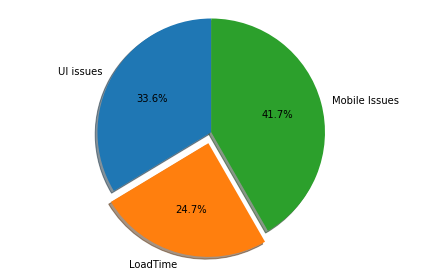

In [100]:
# Pie chart
labels = ['UI issues',
'LoadTime' ,
'Mobile Issues']
sizes = [counter0, counter1, counter2]
# only "explode" the 2nd slice (i.e. 'Hogs')
explode = (0, 0.1, 0)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()